# DNNのフレームワークを使用した実践演習
### はじめに
・実業務ではNumpyからフルスクラッチで実装することは少ない。<br>
・Tensorflow、Keras、Pytorchなどのフレームワークを使って実装をする。<br><br>

今回は、TensorflowとKerasのを使用した実践演習である。<br><br>
・Tensorflow<br>
⇨Googleが開発したDNNフレームワーク。ユーザー数が多い。<br><br>
・Keras<br>
⇨TensorFolowのラッパー。色んな人々に使用されるようにという想いで作成されたらしい。<br>
　その想い通りに、シンプルで初心者に優しい。複雑な処理をしたい場合にはKerasは向かない。<br><br>
 
### TensorFlow
#### constant
定数を定義するために使用する。<br>
sessionを立ち上げてrunしないとプリントの具体的な値がでない。<br>
sessionを立ち上げる前のプリントは型みたいなものが出る。<br>
⇨Tensor("Const:0", shape=(), dtype=int32)<br>

In [1]:
import tensorflow as tf
import numpy as np

# それぞれ定数を定義
a = tf.constant(1)
b = tf.constant(2, dtype=tf.float32, shape=[3,2])
c = tf.constant(np.arange(4), dtype=tf.float32, shape=[2,2])

print('a:', a)
print('b:', b)
print('c:', c)

sess = tf.Session()

print('a:', sess.run(a))
print('b:', sess.run(b))
print('c:', sess.run(c))

a: Tensor("Const:0", shape=(), dtype=int32)
b: Tensor("Const_1:0", shape=(3, 2), dtype=float32)
c: Tensor("Const_2:0", shape=(2, 2), dtype=float32)
a: 1
b: [[2. 2.]
 [2. 2.]
 [2. 2.]]
c: [[0. 1.]
 [2. 3.]]


### placeholder
Placeholderは、後々の値を入れるための箱のようなものを用意している感じ。（自在に変えることができる。）<br>
それが定数とは異なるところ。<br>
feed_dictを用いて、Placeholderに値を代入する。<br>
Placeholderは学習の際にバッチごとに代入するといった時によく使う。<br>

In [2]:
import tensorflow as tf
import numpy as np

# プレースホルダーを定義
x = tf.placeholder(dtype=tf.float32, shape=[None,3])

print('x:', x)

sess = tf.Session()

X = np.random.rand(2,3)
print('X:', X)

# プレースホルダにX[0]を入力
# shapeを(3,)から(1,3)にするためreshape
print('x:', sess.run(x, feed_dict={x:X[0].reshape(1,-1)}))
# プレースホルダにX[1]を入力
print('x:', sess.run(x, feed_dict={x:X[1].reshape(1,-1)}))

x: Tensor("Placeholder:0", shape=(?, 3), dtype=float32)
X: [[0.47669129 0.92741406 0.23230972]
 [0.56687962 0.26238545 0.5322514 ]]
x: [[0.4766913  0.92741406 0.23230973]]
x: [[0.56687963 0.26238546 0.5322514 ]]


### variables
変数を定義する際に使用する。

In [5]:
# 定数を定義
a = tf.constant(10)
print('a:', a)
# 変数を定義
x = tf.Variable(1)
print('x:', x)

calc_op = x * a # 更新式の定義

# xの値を更新
update_x = tf.assign(x, calc_op) 

sess = tf.Session()

# 変数の初期化
init = tf.global_variables_initializer()
sess.run(init)

print(sess.run(x)) # update_xを呼ぶことで更新する．

sess.run(update_x)
print(sess.run(x))

sess.run(update_x)
print(sess.run(x))

a: Tensor("Const_5:0", shape=(), dtype=int32)
x: <tf.Variable 'Variable_2:0' shape=() dtype=int32_ref>
1
10
100


### 線形回帰
Try<br>
・noiseの値を変更しよう<br>
・dの数値を変更しよう<br><br>
ノイズを大きくすると線型性が無くなるので良い予測ができない。

Generation: 10. 誤差 = 0.22624163
Generation: 20. 誤差 = 0.15849636
Generation: 30. 誤差 = 0.13580127
Generation: 40. 誤差 = 0.11854612
Generation: 50. 誤差 = 0.10536428
Generation: 60. 誤差 = 0.09529407
Generation: 70. 誤差 = 0.08760095
Generation: 80. 誤差 = 0.081723824
Generation: 90. 誤差 = 0.07723402
Generation: 100. 誤差 = 0.073804036
Generation: 110. 誤差 = 0.07118373
Generation: 120. 誤差 = 0.069181964
Generation: 130. 誤差 = 0.06765273
Generation: 140. 誤差 = 0.06648446
Generation: 150. 誤差 = 0.06559196
Generation: 160. 誤差 = 0.06491015
Generation: 170. 誤差 = 0.06438926
Generation: 180. 誤差 = 0.063991345
Generation: 190. 誤差 = 0.06368735
Generation: 200. 誤差 = 0.06345513
Generation: 210. 誤差 = 0.06327772
Generation: 220. 誤差 = 0.06314219
Generation: 230. 誤差 = 0.06303863
Generation: 240. 誤差 = 0.062959544
Generation: 250. 誤差 = 0.06289911
Generation: 260. 誤差 = 0.062852934
Generation: 270. 誤差 = 0.062817685
Generation: 280. 誤差 = 0.062790744
Generation: 290. 誤差 = 0.06277016
Generation: 300. 誤差 = 0.062754445
[2.8979402

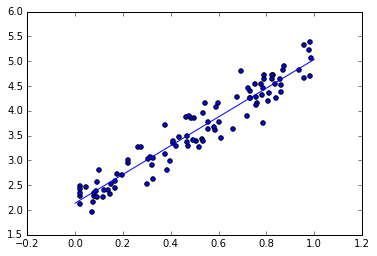

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

iters_num = 300
plot_interval = 10

# データを生成
n = 100
x = np.random.rand(n)
d = 3 * x + 2
#d = 8 * x + 20

# ノイズを加える
noise = 0.3
#noise = 2
d = d + noise * np.random.randn(n) 

# 入力値
xt = tf.placeholder(tf.float32)
dt = tf.placeholder(tf.float32)

# 最適化の対象の変数を初期化
W = tf.Variable(tf.zeros([1]))
b = tf.Variable(tf.zeros([1]))

y = W * xt + b

# 誤差関数 平均2乗誤差
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.train.GradientDescentOptimizer(0.1)
train = optimizer.minimize(loss)

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
x_train = x.reshape(-1,1)
d_train = d.reshape(-1,1)

# トレーニング
for i in range(iters_num):
    sess.run(train, feed_dict={xt:x_train,dt:d_train})
    if (i+1) % plot_interval == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train,dt:d_train}) 
        W_val = sess.run(W)
        b_val = sess.run(b)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))

print(W_val)
print(b_val)

#  予測関数
def predict(x):
    return W_val * x + b_val

fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
plt.scatter(x, d)
linex = np.linspace(0, 1, 2)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()

### 非線形回帰
下式で生成したデータの回帰<br>
$y = 30x^2+0.5x+0.2$<br>

Generation: 100. 誤差 = 25.042307
Generation: 200. 誤差 = 21.024921
Generation: 300. 誤差 = 17.538023
Generation: 400. 誤差 = 14.533619
Generation: 500. 誤差 = 11.96544
Generation: 600. 誤差 = 9.788961
Generation: 700. 誤差 = 7.961465
Generation: 800. 誤差 = 6.442163
Generation: 900. 誤差 = 5.192328
Generation: 1000. 誤差 = 4.175501
Generation: 1100. 誤差 = 3.3576953
Generation: 1200. 誤差 = 2.7076151
Generation: 1300. 誤差 = 2.1968386
Generation: 1400. 誤差 = 1.799979
Generation: 1500. 誤差 = 1.4947631
Generation: 1600. 誤差 = 1.2620393
Generation: 1700. 誤差 = 1.0856785
Generation: 1800. 誤差 = 0.95239466
Generation: 1900. 誤差 = 0.8514889
Generation: 2000. 誤差 = 0.77452964
Generation: 2100. 誤差 = 0.71501344
Generation: 2200. 誤差 = 0.66802055
Generation: 2300. 誤差 = 0.6298984
Generation: 2400. 誤差 = 0.59797907
Generation: 2500. 誤差 = 0.57034117
Generation: 2600. 誤差 = 0.5456211
Generation: 2700. 誤差 = 0.5228648
Generation: 2800. 誤差 = 0.5014171
Generation: 2900. 誤差 = 0.48083687
Generation: 3000. 誤差 = 0.46083602
Generation: 3100. 

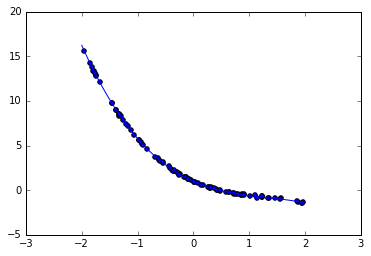

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

iters_num = 10000
plot_interval = 100

# データを生成
n=100
x = np.random.rand(n).astype(np.float32) * 4 - 2
d =  - 0.4 * x ** 3 + 1.6 * x ** 2 - 2.8 * x + 1

#  ノイズを加える
noise = 0.05
d = d + noise * np.random.randn(n) 

# モデル
# bを使っていないことに注意.
xt = tf.placeholder(tf.float32, [None, 4])
dt = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.random_normal([4, 1], stddev=0.01))
y = tf.matmul(xt,W)

# 誤差関数 平均２乗誤差
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.train.AdamOptimizer(0.001)
train = optimizer.minimize(loss)

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
d_train = d.reshape(-1,1)
x_train = np.zeros([n, 4])
for i in range(n):
    for j in range(4):
        x_train[i, j] = x[i]**j

#  トレーニング
for i in range(iters_num):
    if (i+1) % plot_interval == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train, dt:d_train}) 
        W_val = sess.run(W)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))
    sess.run(train, feed_dict={xt:x_train,dt:d_train})

print(W_val[::-1])
    
# 予測関数
def predict(x):
    result = 0.
    for i in range(0,4):
        result += W_val[i,0] * x ** i
    return result

fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
plt.scatter(x ,d)
linex = np.linspace(-2,2,100)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()

try<br>
次の式をモデルとして回帰を行おう<br>
$y=30x^2+0.5x+0.2$<br>
誤差が収束するようiters_numやlearning_rateを調整しよう<br>
下記にしたら良い感じに予測できた。
・iters_num = 13750<br>
・learning_rate = 0.005<br>

Generation: 100. 誤差 = 1454.3655
Generation: 200. 誤差 = 1356.9967
Generation: 300. 誤差 = 1265.1282
Generation: 400. 誤差 = 1178.5287
Generation: 500. 誤差 = 1096.977
Generation: 600. 誤差 = 1020.2611
Generation: 700. 誤差 = 948.1758
Generation: 800. 誤差 = 880.5245
Generation: 900. 誤差 = 817.1172
Generation: 1000. 誤差 = 757.7703
Generation: 1100. 誤差 = 702.3064
Generation: 1200. 誤差 = 650.55334
Generation: 1300. 誤差 = 602.344
Generation: 1400. 誤差 = 557.5158
Generation: 1500. 誤差 = 515.90967
Generation: 1600. 誤差 = 477.3722
Generation: 1700. 誤差 = 441.7511
Generation: 1800. 誤差 = 408.89786
Generation: 1900. 誤差 = 378.66708
Generation: 2000. 誤差 = 350.91547
Generation: 2100. 誤差 = 325.50183
Generation: 2200. 誤差 = 302.28732
Generation: 2300. 誤差 = 281.13486
Generation: 2400. 誤差 = 261.9093
Generation: 2500. 誤差 = 244.47752
Generation: 2600. 誤差 = 228.70844
Generation: 2700. 誤差 = 214.4732
Generation: 2800. 誤差 = 201.64546
Generation: 2900. 誤差 = 190.10184
Generation: 3000. 誤差 = 179.72237
Generation: 3100. 誤差 = 170.39104

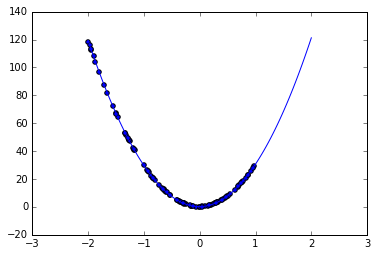

In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

iters_num = 13750
plot_interval = 100

# データを生成
n=100
x = np.random.rand(n).astype(np.float32) * 3 - 2
d =  30 * x ** 2 + 0.5 * x + 0.2

#  ノイズを加える
noise = 0.05
d = d + noise * np.random.randn(n) 

# モデル
# bを使っていないことに注意.
xt = tf.placeholder(tf.float32, [None, 3])
dt = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.random_normal([3, 1], stddev=0.01))
y = tf.matmul(xt,W)

# 誤差関数 平均２乗誤差
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.train.AdamOptimizer(0.005)
train = optimizer.minimize(loss)

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
d_train = d.reshape(-1,1)
x_train = np.zeros([n, 3])
for i in range(n):
    for j in range(3):
        x_train[i, j] = x[i]**j

#  トレーニング
for i in range(iters_num):
    if (i+1) % plot_interval == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train, dt:d_train}) 
        W_val = sess.run(W)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))
    sess.run(train, feed_dict={xt:x_train,dt:d_train})

print(W_val[::-1])
    
# 予測関数
def predict(x):
    result = 0.
    for i in range(0,3):
        result += W_val[i,0] * x ** i
    return result

fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
plt.scatter(x ,d)
linex = np.linspace(-2,2,100)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()

### 分類1層 (mnist)
try<br>
x：入力値, d：教師データ, W：重み, b：バイアス をそれぞれ定義しよう<br>

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
[ True  True  True ...  True False False]
Generation: 1. 正解率 = 0.4071
[False  True  True ... False False False]
Generation: 2. 正解率 = 0.3731
[False  True  True ... False False False]
Generation: 3. 正解率 = 0.4243
[ True False  True ... False False False]
Generation: 4. 正解率 = 0.5534
[ True  True  True ... False False False]
Generation: 5. 正解率 = 0.493
[ True False  True ... False False False]
Generation: 6. 正解率 = 0.6527
[ True False  True ... False False False]
Generation: 7. 正解率 = 0.5929
[ True False  True ... False False  True]
Generation: 8. 正解率

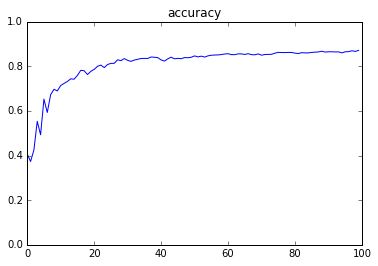

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

iters_num = 100
batch_size = 100
plot_interval = 1

# -------------- ここを補填 ------------------------
x = tf.placeholder(tf.float32, [None, 784])
d = tf.placeholder(tf.float32, [None, 10])
W = tf.Variable(tf.random_normal([784, 10], stddev=0.01))
b = tf.Variable(tf.zeros([10]))
# ------------------------------------------------------

y = tf.nn.softmax(tf.matmul(x, W) + b)

# 交差エントロピー
cross_entropy = -tf.reduce_sum(d * tf.log(y), reduction_indices=[1])
loss = tf.reduce_mean(cross_entropy)
train = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

# 正誤を保存
correct = tf.equal(tf.argmax(y, 1), tf.argmax(d, 1))
# 正解率
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

accuracies = []
for i in range(iters_num):
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x: x_batch, d: d_batch}) # feed_dictで渡す
    if (i+1) % plot_interval == 0: #testデータを用いて正解率を評価
        print(sess.run(correct, feed_dict={x: mnist.test.images, d: mnist.test.labels}))
        accuracy_val = sess.run(accuracy, feed_dict={x: mnist.test.images, d: mnist.test.labels})
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show()        

### 分類3層 (mnist)
try<br>
隠れ層のサイズを変更してみよう<br>
隠れ層を大きくすると精度は上がるけど、計算が重いと感じた。<br>
⇨更新パラメータが増えるから<br>

一方、隠れ層の数を減らすと精度が下がり、かつ計算がスムーズになる。<br>
特徴抽出が減るから予測がうまくできない感じ。**精度とスピードはトレードオフ。**<br>

try<br>
optimizerを変更しよう<br>
精度が上手く改善されない場合、optimizerを変更することは良いかも。(使うoptimizerは大体決まっているようだが。。。)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Generation: 100. 正解率 = 0.1922
Generation: 200. 正解率 = 0.5062
Generation: 300. 正解率 = 0.6366
Generation: 400. 正解率 = 0.7235
Generation: 500. 正解率 = 0.7897
Generation: 600. 正解率 = 0.8223
Generation: 700. 正解率 = 0.8453
Generation: 800. 正解率 = 0.8554
Generation: 900. 正解率 = 0.8675
Generation: 1000. 正解率 = 0.8766
Generation: 1100. 正解率 = 0.8849
Generation: 1200. 正解率 = 0.8898
Generation: 1300. 正解率 = 0.8921
Generation: 1400. 正解率 = 0.8956
Generation: 1500. 正解率 = 0.8992
Generation: 1600. 正解率 = 0.9016
Generation: 1700. 正解率 = 0.9028
Generation: 1800. 正解率 = 0.9038
Generation: 1900. 正解率 = 0.9065
Generation: 2000. 正解率 = 0.9085
Generation: 2100. 正解率 = 0.9077
Generation: 2200. 正解率 = 0.9108
Generation: 2300. 正解率 = 0.9122
Generation: 2400. 正解率 = 0.9152
Generation: 2500. 正解率 = 0.914
Generation: 2600. 正解率 = 0.9173
Generation

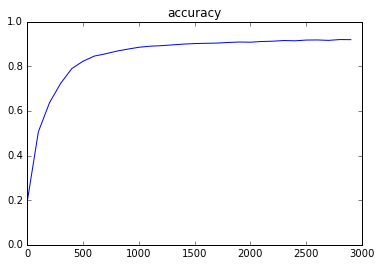

In [7]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
%matplotlib inline
#隠れ層を大きくすると精度は上がるけど、計算が重いと感じた。更新パラメータが増えるからだ。
#一方隠れ層の数を減らすと精度が下がり、かつ計算がスムーズになる。特徴抽出が減るから予測がうまくできない感じ。精度とスピードはトレードオフ.
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

iters_num = 3000
batch_size = 100
plot_interval = 100

hidden_layer_size_1 = 1500
hidden_layer_size_2 = 800
#hidden_layer_size_1 = 100
#hidden_layer_size_2 = 40

dropout_rate = 0.5

x = tf.placeholder(tf.float32, [None, 784])
d = tf.placeholder(tf.float32, [None, 10])
W1 = tf.Variable(tf.random_normal([784, hidden_layer_size_1], stddev=0.01))
W2 = tf.Variable(tf.random_normal([hidden_layer_size_1, hidden_layer_size_2], stddev=0.01))
W3 = tf.Variable(tf.random_normal([hidden_layer_size_2, 10], stddev=0.01))

b1 = tf.Variable(tf.zeros([hidden_layer_size_1]))
b2 = tf.Variable(tf.zeros([hidden_layer_size_2]))
b3 = tf.Variable(tf.zeros([10]))

z1 = tf.sigmoid(tf.matmul(x, W1) + b1)
z2 = tf.sigmoid(tf.matmul(z1, W2) + b2)

keep_prob = tf.placeholder(tf.float32)
drop = tf.nn.dropout(z2, keep_prob)

y = tf.nn.softmax(tf.matmul(drop, W3) + b3)
loss = tf.reduce_mean(-tf.reduce_sum(d * tf.log(y), reduction_indices=[1]))

# optimizer = tf.train.GradientDescentOptimizer(0.5)
# optimizer = tf.train.MomentumOptimizer(0.1, 0.9) 
# optimizer = tf.train.AdagradOptimizer(0.1)
# optimizer = tf.train.RMSPropOptimizer(0.001)
optimizer = tf.train.AdamOptimizer(1e-4)

train = optimizer.minimize(loss)
correct = tf.equal(tf.argmax(y, 1), tf.argmax(d, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

accuracies = []
for i in range(iters_num):
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x:x_batch, d:d_batch, keep_prob:(1 - dropout_rate)})
    if (i+1) % plot_interval == 0:
        accuracy_val = sess.run(accuracy, feed_dict={x:mnist.test.images, d:mnist.test.labels, keep_prob:1.0})            
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))        
    
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show()            

### 分類CNN (mnist)
try<br>
ドロップアウト率を0に変更しよう<br>
汎化性能は落ち、結果として正答率が下がった。ドロップアウトの有効性を感じた。<br>

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Generation: 10. 正解率 = 0.27
Generation: 20. 正解率 = 0.38
Generation: 30. 正解率 = 0.54
Generation: 40. 正解率 = 0.63
Generation: 50. 正解率 = 0.65
Generation: 60. 正解率 = 0.81
Generation: 70. 正解率 = 0.77
Generation: 80. 正解率 = 0.83
Generation: 90. 正解率 = 0.83
Generation: 100. 正解率 = 0.93
Generation: 110. 正解率 = 0.9
Generation: 120. 正解率 = 0.86
Generation: 130. 正解率 = 0.8
Generation: 140. 正解率 = 0.95
Generation: 150. 正解率 = 0.87
Generation: 160. 正解率 = 0.94
Generation: 170. 正解率 = 0.87
Generation: 180. 正解率 = 0.89
Generation: 190. 正解率 = 0.94
Generation: 200. 正解率 = 0.93
Generation: 210. 正解率 = 0.94
Generation: 220. 正解率 = 0.95
Generation: 230. 正解率 = 0.91
Generation: 240. 正解率 = 0.91
Generation: 250. 正解率 = 0.96
Generation: 260. 正解率 = 0.92
Generation: 270. 正解率 = 0.94
Generation: 280. 正解率 = 0.94
Generation: 290. 正解率 = 0.94
Gener

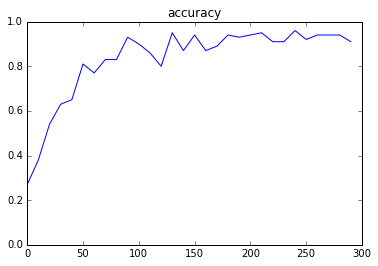

In [8]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
import matplotlib.pyplot as plt
%matplotlib inline

iters_num = 300
batch_size = 100
plot_interval = 10

dropout_rate = 0.0
#dropout_rate = 0.5

# placeholder
x = tf.placeholder(tf.float32, shape=[None, 784])
d = tf.placeholder(tf.float32, shape=[None, 10])

# 画像を784の一次元から28x28の二次元に変換する
# 画像を28x28にreshape
x_image = tf.reshape(x, [-1,28,28,1])

# 第一層のweightsとbiasのvariable
W_conv1 = tf.Variable(tf.truncated_normal([5, 5, 1, 32], stddev=0.1))
b_conv1 = tf.Variable(tf.constant(0.1, shape=[32]))

# 第一層のconvolutionalとpool
# strides[0] = strides[3] = 1固定
h_conv1 = tf.nn.relu(tf.nn.conv2d(x_image, W_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1)
# プーリングサイズ n*n にしたい場合 ksize=[1, n, n, 1]
h_pool1 = tf.nn.max_pool(h_conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# 第二層
W_conv2 = tf.Variable(tf.truncated_normal([5, 5, 32, 64], stddev=0.1))
b_conv2 = tf.Variable(tf.constant(0.1, shape=[64]))
h_conv2 = tf.nn.relu(tf.nn.conv2d(h_pool1, W_conv2, strides=[1, 1, 1, 1], padding='SAME') + b_conv2)
h_pool2 = tf.nn.max_pool(h_conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# 第一層と第二層でreduceされてできた特徴に対してrelu
W_fc1 = tf.Variable(tf.truncated_normal([7 * 7 * 64, 1024], stddev=0.1))
b_fc1 = tf.Variable(tf.constant(0.1, shape=[1024]))
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

# Dropout
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# 出来上がったものに対してSoftmax
W_fc2 = tf.Variable(tf.truncated_normal([1024, 10], stddev=0.1))
b_fc2 = tf.Variable(tf.constant(0.1, shape=[10]))
y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

# 交差エントロピー
loss = -tf.reduce_sum(d * tf.log(y_conv))

train = tf.train.AdamOptimizer(1e-4).minimize(loss)

correct = tf.equal(tf.argmax(y_conv,1), tf.argmax(d,1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)


accuracies = []
for i in range(iters_num):
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x: x_batch, d: d_batch, keep_prob: 1-dropout_rate})
    if (i+1) % plot_interval == 0:
        accuracy_val = sess.run(accuracy, feed_dict={x:x_batch, d: d_batch, keep_prob: 1.0})
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))        
    
    
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show()                

### 確認テスト
VGG・GoogLeNet・ResNetの特徴をそれぞれ簡潔に述べよ<br><br>
**VGG**<br>
2014年 Convolution、Convolution、max_poolという単純なネットワークの積み重ねでできており、シンプルなネットワーク構成。パラメータ数はGoogLeNet・ResNetに比べて多い<br><br>
**GoogLeNet**<br>
inception moduleを用いる。1×11×1の畳み込みを使った次元削減や様々なフィルターサイズを使うことによるスパースな演算が特徴<br><br>
**ResNet**<br>
スキップコネクションアイデンティモジュールを使うことによって残差接続を行い、それによりより深い層での学習が可能<br>
※スキップコネクション（勾配消失問題の改善）

# Keras
TensorFlowのように事前に変数等々を定義しなくてよくて、とてもシンプルでわかりやすいことがわかる。
### 線形回帰

Using TensorFlow backend.
/Users/taniyan/.pyenv/versions/anaconda3-2.4.1/lib/python3.5/site-packages/ipykernel/__main__.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, units=1)`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Generation: 10. 誤差 = 3.0252392
Generation: 20. 誤差 = 2.0682704
Generation: 30. 誤差 = 1.4233414
Generation: 40. 誤差 = 0.9874977
Generation: 50. 誤差 = 0.6919092
Generation: 60. 誤差 = 0.49053925
Generation: 70. 誤差 = 0.3525801
Generation: 80. 誤差 = 0.25739992
Generation: 90. 誤差 = 0.1911683
Generation: 100. 誤差 = 0.14460276
Generation: 110. 誤差 = 0.11146335
Generation: 120. 誤差 = 0.087546766
Generation: 130. 誤差 = 0.07001387
Generation: 140. 誤差 = 0.056940764
Generation: 150. 誤差 = 0.047017913
Generation: 160. 誤差 = 0.039349314
Generation: 170. 誤差 = 0.03331757
Generation: 180. 誤差 = 0.02849395
Generation: 190. 誤差 = 0.024577556
Generation: 200. 誤差 = 0.021354826
Generation: 210. 誤差 = 0.01

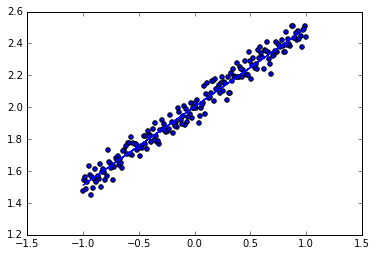

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

iters_num = 1000
plot_interval = 10

x = np.linspace(-1, 1, 200)
np.random.shuffle(x)
d = 0.5 * x + 2 + np.random.normal(0, 0.05, (200,))

from keras.models import Sequential
from keras.layers import Dense

# モデルを作成
model = Sequential()
model.add(Dense(input_dim=1, output_dim=1))

# モデルを表示
model.summary()

# モデルのコンパイル
model.compile(loss='mse', optimizer='sgd')

# train
for i in range(iters_num):
    loss = model.train_on_batch(x, d)
    if (i+1) % plot_interval == 0:
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss))

W, b = model.layers[0].get_weights()
print('W:', W)
print('b:', b)

y = model.predict(x)
plt.scatter(x, d)
plt.plot(x, y)
plt.show()

### 単純パーセプトロン
try<br>
・np.random.seed(0)をnp.random.seed(1)に変更<br>
・エポック数を100に変更<br>
・AND回路, XOR回路に変更<br>
・OR回路にしてバッチサイズを10に変更<br>
・エポック数を300に変更しよう<br>

In [10]:
#初期値によって学習結果が異なる。そのため、1〜３パターン用意して平均したものを精度とするなどの手法もある。
#epochは学習に影響するパラメータ。学習の数を減らすと基本的に精度は下がる。
#実際の実務は学習で使ってない検証データを使って精度を測る。そして、検証データに対する精度が下がらなくなるまで学習を回すことが重要。
#xorにすると学習を増やしても精度は変わらない。なぜかというと、1層しかないパーセプトロンは線形分離にしか適応できないから。さらにxorは非線形回帰なデータ。
#そのため、Leruやsigmoidなどの非線形関数に通すことで非線形構造にしてあげると精度が上がる。
#バッチサイズについて、基本的に2^nの数値にする。GPUの性能上2^で計算すると一番性能が出せるらしい。
#データ数が多い場合はバッチサイズを大きめに、データ数が少ない場合は小さめにするのが基本。

# モジュール読み込み
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
%matplotlib inline
 
# 乱数を固定値で初期化
np.random.seed(1)
#np.random.seed(32)

# シグモイドの単純パーセプトロン作成
model = Sequential()
model.add(Dense(input_dim=2, units=1))
model.add(Activation('sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))
 
# トレーニング用入力 X と正解データ T
X = np.array( [[0,0], [0,1], [1,0], [1,1]] )
T = np.array( [[0], [1], [1], [1]] ) #or回路
#T = np.array( [[1], [0], [0], [1]] ) #xor回路
#T = np.array( [[0], [0], [0], [1]] ) #and回路

True, True,True,True
 
# トレーニング
model.fit(X, T, epochs=10, batch_size=1)
 
# トレーニングの入力を流用して実際に分類
Y = model.predict_classes(X, batch_size=1)

print("TEST")
print(Y == T)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 3         
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
4/4 [==============================] - 0s 32ms/step - loss: 0.4976
Epoch 2/10
4/4 [==============================] - 0s 2ms/step - loss: 0.4734
Epoch 3/10
4/4 [==============================] - 0s 2ms/step - loss: 0.4528
Epoch 4/10
4/4 [==============================] - 0s 2ms/step - loss: 0.4364
Epoch 5/10
4/4 [==============================] - 0s 2ms/step - loss: 0.4231
Epoch 6/10
4/4 [==============================] - 0s 3ms/step - loss: 0.4115
Epoch 7/10
4/4 [==============================] - 0s 2ms/step - loss: 0.4016
Epoc

### 分類 (iris)
try<br>
・中間層の活性関数をsigmoidに変更しよう<br>
・SGDをimportしoptimizerをSGD(lr=0.1)に変更しよう<br>

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                60        
_________________________________________________________________
activation_2 (Activation)    (None, 12)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 39        
_________________________________________________________________
activation_3 (Activation)    (None, 3)                 0         
Total params: 99
Trainable params: 99
Non-trainable params: 0
_________________________________________________________________
Train on 120 samples, validate on 30 samples
Epoch 1/20
120/120 [==============================] - 0s 2ms/step - loss: 1.0712 - acc: 0.5750 - val_loss: 0.5498 - val_acc: 0.6667
Epoch 2/20
120/120 [==============================] - 0s 449us/step - loss: 0.5433 - acc: 0.7000 - va

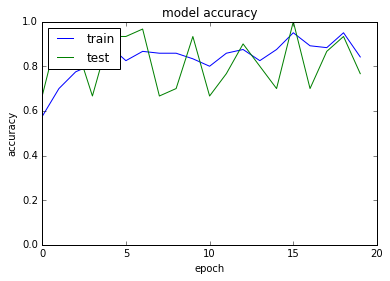

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
iris = datasets.load_iris()
x = iris.data
d = iris.target

#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

x_train, x_test, d_train, d_test = train_test_split(x, d, test_size=0.2)

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

# from keras.optimizers import SGD

#モデルの設定
model = Sequential()
model.add(Dense(12, input_dim=4))
model.add(Activation('relu'))
#model.add(Activation('sigmoid'))
model.add(Dense(3, input_dim=12))
model.add(Activation('softmax'))
model.summary()

#model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy']) #optimizer='sgd'だとdefault値(0.01)で渡すことになる
model.compile(optimizer=SGD(lr=0.1), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, d_train, batch_size=5, epochs=20, verbose=1, validation_data=(x_test, d_test))
loss = model.evaluate(x_test, d_test, verbose=0)

#Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(0, 1.0)
plt.show()


### 分類(mnist)
try<br>
・load_mnistのone_hot_labelをFalseに変更しよう (error)<br>
・誤差関数をsparse_categorical_crossentropyに変更しよう<br>
・Adamの引数の値を変更しよう<br>

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 152us/step - loss: 0.2487

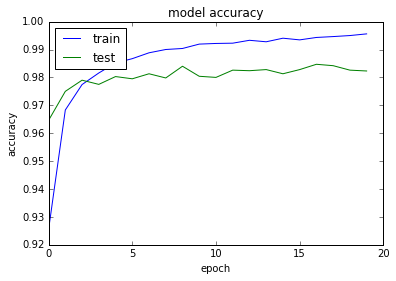

In [16]:
#one_hot_labelの時は、categorical_crossentropyを使う
#one_hot_labelのじゃない時は、sparse_categorical_crossentropyを使う
#学習率は慎重に選ぶ必要がある。大きすぎても良くないし、低すぎても良くない。

# 必要なライブラリのインポート
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import keras
import matplotlib.pyplot as plt
from MNIST_data.mnist import load_mnist
#from data.mnist import load_mnist
%matplotlib inline

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=False)
#(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

# 必要なライブラリのインポート、最適化手法はAdamを使う
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# モデル作成
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()

# バッチサイズ、エポック数
batch_size = 128
epochs = 20

#model.compile(loss='categorical_crossentropy', 
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), 
              metrics=['accuracy'])

history = model.fit(x_train, d_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, d_test))
loss = model.evaluate(x_test, d_test, verbose=0)
print('Test loss:', loss[0])
print('Test accuracy:', loss[1])
#Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.ylim(0, 1.0)
plt.show()

### RNN
2進数足し算の予測<br>
Keras RNNのドキュメント https://keras.io/ja/layers/recurrent/#simplernn<br><br>
try<br>
・RNNの出力ノード数を128に変更<br>
　⇨精度が上がる<br>
・RNNの出力活性化関数を sigmoid に変更<br>
　⇨reluと比べて精度が落ちる<br>
・RNNの出力活性化関数を tanh に変更<br>
　⇨reluと同じくらいの精度<br>
・最適化方法をadamに変更<br>
　⇨精度が上がる<br>
・RNNの入力 Dropout を0.5に設定<br>
　⇨汎化性能は上がるが、学習の収束速度は落ちる。<br>
・RNNの再帰 Dropout を0.3に設定<br>
　⇨上と同じ。<br>
・RNNのunrollをTrueに設定<br>
　⇨メモリ集中傾向になるがスピードアップができる。これは初めて知った。<br>
・GRU、LSTMも実装可能<br>
　⇨RNNをGRU、LSTMに変更すると使用できる。<br>

In [17]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout,Activation
from keras.layers.wrappers import TimeDistributed
from keras.optimizers import SGD
from keras.layers.recurrent import SimpleRNN, LSTM, GRU


# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)

# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)], dtype=np.uint8).T,axis=1)[:, ::-1]


# A, B初期化 (a + b = d)
a_int = np.random.randint(largest_number/2, size=20000)
a_bin = binary[a_int] # binary encoding
b_int = np.random.randint(largest_number/2, size=20000)
b_bin = binary[b_int] # binary encoding

x_int = []
x_bin = []
for i in range(10000):
    x_int.append(np.array([a_int[i], b_int[i]]).T)
    x_bin.append(np.array([a_bin[i], b_bin[i]]).T)

x_int_test = []
x_bin_test = []
for i in range(10001, 20000):
    x_int_test.append(np.array([a_int[i], b_int[i]]).T)
    x_bin_test.append(np.array([a_bin[i], b_bin[i]]).T)

x_int = np.array(x_int)
x_bin = np.array(x_bin)
x_int_test = np.array(x_int_test)
x_bin_test = np.array(x_bin_test)


# 正解データ
d_int = a_int + b_int
d_bin = binary[d_int][0:10000]
d_bin_test = binary[d_int][10001:20000]

model = Sequential()

model.add(SimpleRNN(units=16,     #GRU、LSTMに変更できる
               return_sequences=True,
               input_shape=[8, 2],
               go_backwards=False,
               activation='relu',
               # dropout=0.5,
               # recurrent_dropout=0.3,
               # unroll = True,
            ))
# 出力層
model.add(Dense(1, activation='sigmoid', input_shape=(-1,2)))
model.summary()
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.1), metrics=['accuracy'])
# model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_bin, d_bin.reshape(-1, 8, 1), epochs=5, batch_size=2)

# テスト結果出力
score = model.evaluate(x_bin_test, d_bin_test.reshape(-1,8,1), verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 8, 16)             304       
_________________________________________________________________
dense_8 (Dense)              (None, 8, 1)              17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
10000/10000 [==============================] - 30s 3ms/step - loss: 0.0849 - acc: 0.9092
Epoch 2/5
10000/10000 [==============================] - 31s 3ms/step - loss: 0.0031 - acc: 1.0000
Epoch 3/5
10000/10000 [==============================] - 28s 3ms/step - loss: 9.6719e-04 - acc: 1.0000
Epoch 4/5
10000/10000 [==============================] - 27s 3ms/step - loss: 5.5436e-04 - acc: 1.0000
Epoch 5/5
10000/10000 [==============================] - 27s 3ms/step - loss: 3.7884e-04 - acc: 1.0000
Test loss: 0.0003289338040789838


# 強化学習
### 強化学習とは？
長期的に報酬を最大化できるように環境の中で行動を選択できるエージェントを作ることを目標とする機械学習の一分野<br>
行動の結果として与えられる利益(報酬)をもとに、行動を決定する原理を改善していく仕組み<br>
### 応用例
強化学習の応用分野<br>
⇨ボードゲーム(アルファ碁)、テレビゲーム<br><br>
閉じた系を解く問題であれば強化学習のパワーが発揮できる。<br>
### 探索と利用のトレードオフ
環境について事前に完璧な知識があれば、 最適な行動を予測し決定することは可能。<br>
⇨どのような顧客にキャンペーンメールを送信すると、 どのような行動を行うのかが既知である状況。<br><br>
しかし、強化学習の場合、上記仮定は成り立たないとする。 <br>
**不完全な知識を元に行動しながら、データを収集。 最適な行動を見つけていく。**<br><br>
過去のデータで、ベストとされる行動のみを常に取り続けていると、**他のよりベストな行動を見つけることができない = 探索が足りない状態**<br>
未知の行動のみを常に取り続けていると、**過去の経験が活かせない = 利用が足りない状態**<br>
### 強化学習のイメージ
ある行動(方策)をした結果、状態が変わる(環境)。その状態を見て評価する(報酬)。<br>
そのイメージ図が下記。<br>
<img src="写真/強化学習.PNG" width="360" align="left">

###  強化学習の差分
強化学習と通常の教師あり、教師なし学習との違い<br><br>
結論:目標が違う<br>
・教師なし、あり学習<br>
　データに含まれるパターンを見つけ出すことや，そのデータから予測することが目標<br>
・強化学習<br>
　優れた方策を見つけることが目標<br>

### 強化学習の歴史
強化学習について<br>
・冬の時代があったが、計算速度の進展により大規模な状態をもつ場合の、強化学習を可能としつつある<br>
・関数近似法と、Q学習を組み合わせる手法の登場<br><br>
Q学習<br>
・行動価値関数を、行動する毎に更新することにより学習を進める方法<br>
関数近似法<br>
・価値関数や方策関数を関数近似する手法のこと<br>
### 行動価値関数
行動価値関数とは<br>
価値を表す関数としては、状態価値関数と行動価値関数の2種類がある<br><br>
**状態価値関数**<br>
ある状態の価値に注目する<br><br>
**行動価値関数**<br>
状態と価値を組み合わせた価値に注目する<br>
### 方策関数
方策ベースの強化学習手法において、ある状態でどのような行動を取るかの確率を与える関数
### 方策勾配法について
方策反復法 方策をモデル化して最適化する手法<br>
<img src="写真/方策勾配法.PNG" width="360" align="left">

Jとは? 方策の良さ → 定義しないといけない<br>
定義方法 ・平均報酬 ・割引報酬和 上記の定義に対応して、行動価値関数:Q(s,a)の定義を行い。 方策勾配定理が成り立つ。<br>
<img src="写真/方策勾配定理.PNG" width="360" align="left">

### 策勾配定理導出のポイント
方策勾配定理は基本的には下記の2式から導出される<br>
<img src="写真/方策勾配定理導出のポイント.PNG" width="480" align="left">

# DCGAN
敵対的ネットワークとCNNを使って、画像生成を行う。<br>
オートエンコーダも同じようなことができる。最近の流行りの一つ。<br>
データの水増しとして使用できると良いなと感じる。<br>
<img src="写真/DCGAN.PNG" width="480" align="left">
<img src="写真/DCGANの例.PNG" width="420" align="left">